In [81]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import linregress

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [82]:
Happiness_finance = pd.read_csv("Resources/Happiness_finance_final2.csv")
cost_of_living = pd.read_csv("Resources/living_cost.csv")

In [83]:
Happiness_finance.head()

,Unnamed: 0,Country,Country Code,Region,Happiness Ranking,Happiness Score,Gross GDP 2015,Unemployment Rate 2015(%),GDP Per Capita 2015(USD),Gross GDP 2015(USD Billion),GDP Per Capita 2015(USD in thousands)
0,0,Switzerland,CHE,Western Europe,1,7.59,679289166858.24,4.80,82510.41,679.29,82.51
1,1,Iceland,ISL,Western Europe,2,7.56,16942247373.97,3.98,52158.36,16.94,52.16
2,2,Denmark,DNK,Western Europe,3,7.53,301298464861.39,6.17,53235.65,301.30,53.24
3,3,Norway,NOR,Western Europe,4,7.52,386663139402.71,4.30,74280.67,386.66,74.28
4,4,Canada,CAN,North America,5,7.43,1559623393038.66,6.91,43559.73,"1,559.62",43.56


In [84]:
cost_of_living.columns

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [85]:
Happiness_living = pd.merge(Happiness_finance, cost_of_living, on='Country', how='left')
Happiness_living.columns

Index(['Unnamed: 0', 'Country', 'Country Code', 'Region', 'Happiness Ranking',
       'Happiness Score', 'Gross GDP 2015', 'Unemployment Rate 2015(%) ',
       'GDP Per Capita 2015(USD)', 'Gross GDP 2015(USD Billion)',
       'GDP Per Capita 2015(USD in thousands) ', 'Rank',
       'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index'],
      dtype='object')

In [86]:
Happiness_living = Happiness_living.loc[:, ['Country', 'Country Code', 'Region', 'Happiness Ranking',
       'Happiness Score','Cost of Living Index','Local Purchasing Power Index']]

In [87]:
Happiness_living.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 7 columns):
Country                         136 non-null object
Country Code                    136 non-null object
Region                          136 non-null object
Happiness Ranking               136 non-null int64
Happiness Score                 136 non-null float64
Cost of Living Index            100 non-null float64
Local Purchasing Power Index    100 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.5+ KB


In [88]:
region = Happiness_living.groupby('Region') 

In [89]:
Happiness_living_new = Happiness_living.dropna()

In [90]:
new_region = Happiness_living_new.groupby('Region') 
#new_region.count()

In [103]:
Happiness_living_new.head(130)

,Country,Country Code,Region,Happiness Ranking,Happiness Score,Cost of Living Index,Local Purchasing Power Index
0,Switzerland,CHE,Western Europe,1,7.59,124.51,210.00
1,Iceland,ISL,Western Europe,2,7.56,95.41,111.09
2,Denmark,DNK,Western Europe,3,7.53,88.31,164.26
3,Norway,NOR,Western Europe,4,7.52,109.30,139.78
4,Canada,CAN,North America,5,7.43,73.53,143.94
5,Finland,FIN,Western Europe,6,7.41,76.89,149.42
6,Netherlands,NLD,Western Europe,7,7.38,74.43,150.57
7,Sweden,SWE,Western Europe,8,7.36,73.86,156.16
8,New Zealand,NZL,Australia and New Zealand,9,7.29,79.84,118.84
9,Australia,AUS,Australia and New Zealand,10,7.28,89.50,157.97


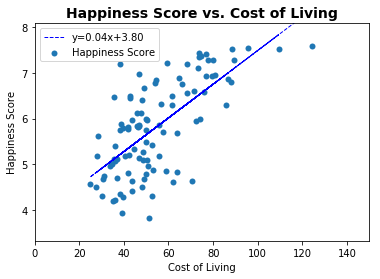

In [99]:
living = Happiness_living_new["Cost of Living Index"]
x_axis = living

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_living, intercept_living, r_living , p_living, se_living) = linregress(x_axis,Happiness_living_new["Happiness Score"] )
fit_living = slope_living * x_axis + intercept_living

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Cost of Living", fontsize=14, fontweight="bold")

plt.xlim(0,150)
      
plt.ylim(min(Happiness_living_new["Happiness Score"]-0.5),max(Happiness_living_new["Happiness Score"])+0.5)
plt.scatter(x_axis,Happiness_living_new["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis, fit_living,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_living,intercept_living))

plt.ylabel("Happiness Score")
plt.xlabel("Cost of Living")
plt.legend()


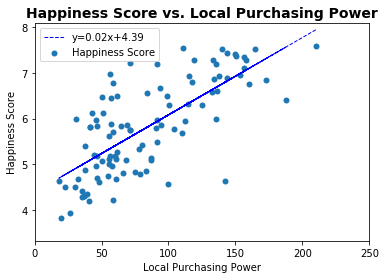

In [102]:
LPP = Happiness_living_new["Local Purchasing Power Index"]
x_axis = LPP

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_LPP, intercept_LPP, r_LPP , p_LPP, se_LPP) = linregress(x_axis,Happiness_living_new["Happiness Score"] )
fit_LPP = slope_LPP * x_axis + intercept_LPP

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Local Purchasing Power", fontsize=14, fontweight="bold")

plt.xlim(0,250)
      
plt.ylim(min(Happiness_living_new["Happiness Score"]-0.5),max(Happiness_living_new["Happiness Score"])+0.5)
plt.scatter(x_axis,Happiness_living_new["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis, fit_LPP,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_LPP,intercept_LPP))

plt.ylabel("Happiness Score")
plt.xlabel("Local Purchasing Power")
plt.legend()

